In [1]:
from lib.controller import Controller
from lib.automation import FileDetector
from lib.file.TIF import TIFArrayFile
from lib.analysis.ROI_identification import *
from lib.file.ROI_writer import ROIFileWriter
import time
import os
from lib.utilities import *

In [17]:
date = "07-12-22"
data_dir = "C:/Users/jjudge3/Desktop/Data/" + date +"/"
camera_program = 4

slice_target = 1
rec_target = [i for i in range(1,24)]

load_dic = False
num_regions_to_export = 5  # max number of regions per record to export to PhotoZ
process_all = False  # overrides slice/rec target to process all files

time_course_types = ['Max', 'Avg']
time_course_choice = 1  # index

# recording schedule
int_trial = 10
num_trial = 5
int_recording = 45
tbs_recording_no = 5

actual_int_recording = int_trial * num_trial + int_recording

# cluster filter settings
n_pixel_cutoff = 3  # maximum cluster size allowed
average_snr_cutoff_percentile = 50  # cluster-specific percentile


In [3]:
# read in 8-bit single TIF images to array, apply same cropping/binning
single_images = {}

if load_dic:
    dic_dir = data_dir + "dic/"

    cam_settings = CameraSettings().get_program_settings(camera_program)
    binning = int(cam_settings['height'] / 80)

    for filename in os.listdir(dic_dir):
        if filename.endswith(".tif"):

            tif = TIFArrayFile(filename, dic_dir, cam_settings, binning,
                              show_image=(str(slice_target) in filename and
                                          'e' in filename))

            img = tif.get_data()
            meta = tif.get_meta()
            slic = meta['slice_number']
            loc = meta['location_number']
            img_type = meta['img_type']

            if slic not in single_images:
                single_images[slic] = {}
            if loc not in single_images[slic]:
                single_images[slic][loc] = {}

            single_images[slic][loc][img_type] = img

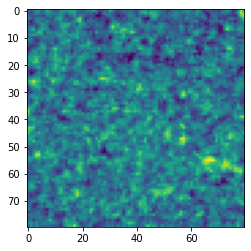

In [4]:
# read in non-normalized maps exported from PhotoZ: 
#  pre-stim SNR, stim SNR, and stim MaxAmp (DAT files)
dat_dir = data_dir + "converted_zda/"
for filename in os.listdir(dat_dir):
    if filename.endswith(".dat") and filename[:3] != "ROI":
        map_type = filename[:3]
        name_parse = filename.split('.')[0][-8:]
        try:
            slic, loc, rec = [int(x) for x in name_parse.split('_')]
        except ValueError:
            continue
        if slic not in single_images:
            single_images[slic] = {}
        if loc not in single_images[slic]:
            single_images[slic][loc] = {}
        if map_type not in single_images[slic][loc]:
            single_images[slic][loc][map_type] = {}
        dat = np.loadtxt(dat_dir + filename,
                         delimiter='\t',
                         usecols=(1,))
        width = int(np.sqrt(dat.shape[0]))
        dat = dat.reshape((width, width))
        if map_type == "SNR" and slic == slice_target and rec in rec_target:
            plt.imshow(dat)
        single_images[slic][loc][map_type][rec] = {
            'data': dat,
            'filename': filename}

In [5]:
# record stim amplitudes manually
stims = {}
# for 06-21-22
"""
single_images[1][1]['stims'] = [100, 100, 100, 80, 80, 60, 60, 40, 40]
single_images[2][1]['stims'] = [40, 100, 100, 80, 80, 60, 60]
single_images[3][1]['stims'] = [100, 100, 80, 80, 60, 60]
"""

# for 07-12-22
single_images[1][1]['stims'] = [80, 60, 60, 50, 40] + [40 for _ in range(6, 24)]

In [6]:
roi = ROI_Identifier()

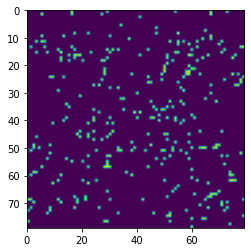

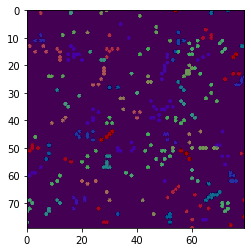

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs85-SNR01_01_01.dat
5 85 [[1297, 1377, 1455, 1298, 1299, 1056, 1460, 1137, 1295], [5010], [1346, 1502, 1424], [4723, 4801, 4722, 4565], [2846, 2851, 2685, 3248, 3088, 2929, 2930, 3165, 2692, 2853, 3166, 2927]]


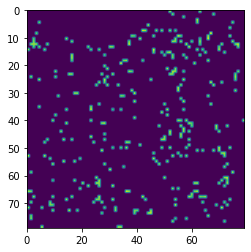

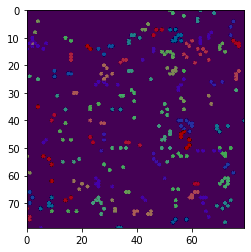

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs90-SNR01_01_01.dat
5 85 [[1126, 967, 802, 963, 961, 1044, 1120, 1042, 882], [2375, 2216, 2057, 2295], [5066, 5065, 5146, 4905, 4986, 5151], [4142, 4148, 4150, 4144], [2193, 2106, 2108, 2185, 2189]]


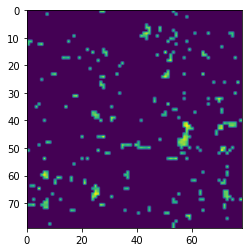

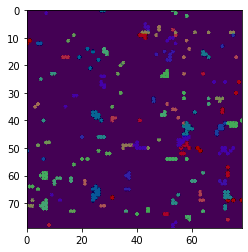

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs95-SNR01_01_01.dat
5 85 [[4043, 4042, 3960, 4040, 3880, 3959, 4041], [931, 853, 852, 1014], [5369, 5532], [4233, 4071, 4151, 4154, 4230, 4152, 4072, 4075], [1948, 2107, 2268, 2188, 1947, 2187]]


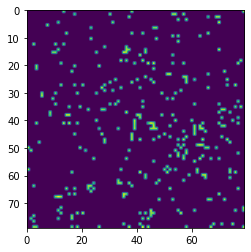

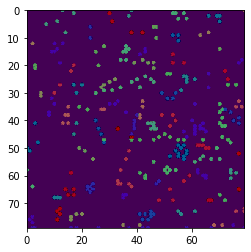

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs85-SNR01_01_02.dat
5 85 [[5395, 5475, 5396], [1321, 1163, 1243], [3423, 3504, 3421, 3585, 3503, 3738, 3581, 3661, 3501, 3577, 3344], [2569, 3048, 2968, 2730], [6081, 6002, 6162]]


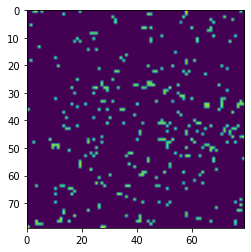

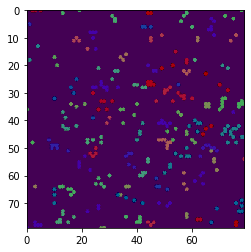

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs90-SNR01_01_02.dat
5 85 [[5706, 5786, 5862], [3328, 3249, 3330, 3329, 3332, 3411], [2265, 2264, 2107, 2273, 2187, 2269, 2268, 2349], [547, 388, 626, 627, 307, 788], [5652, 5731, 5648]]


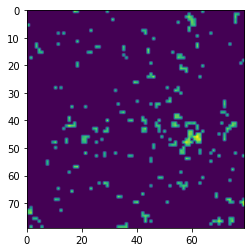

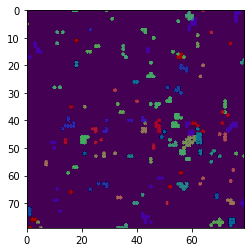

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs95-SNR01_01_02.dat
5 85 [[3849, 4010, 3850], [3580, 3338, 3339, 3659, 3660, 3579, 3418], [1244, 1164], [4929, 5165, 4928], [5678, 5599, 5679, 5759]]


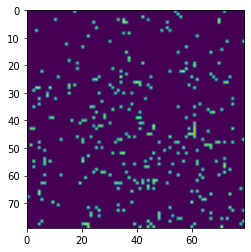

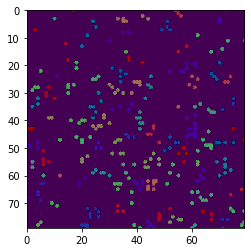

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs85-SNR01_01_03.dat
5 85 [[910, 675, 677], [3421, 3341, 3741, 3661, 3501, 3659, 3178, 3499, 3660, 3581, 3101, 3738], [4901, 5059], [4704, 4863, 4944, 5022], [2911, 2917, 2834, 2758]]


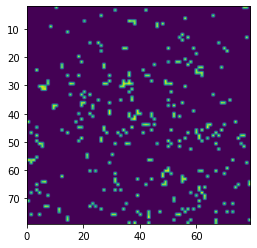

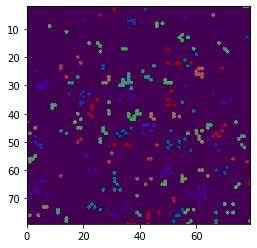

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs90-SNR01_01_03.dat
5 85 [[2003, 2404, 2406, 2327, 2486, 2485, 2405, 2247], [2949, 2872, 2950, 2706], [4928, 5008, 4770, 4850, 4931, 4849], [2837, 2757, 2596, 2833], [5441, 5680, 5125, 5126, 5527, 5203, 5444, 5363]]


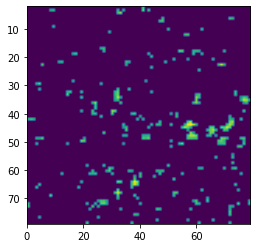

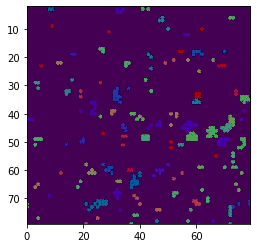

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs95-SNR01_01_03.dat
5 85 [[4150, 4069, 3991, 3990, 4070, 4148, 4149, 3989, 4068], [5473, 5632, 5471, 5953, 5472, 5552, 5392], [3566, 3643, 3487, 3564, 3567], [3064, 2903, 2984, 3139, 2904, 3143, 3224, 3223], [1016, 1017]]


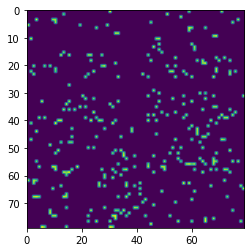

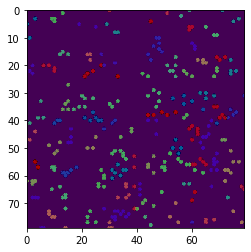

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs85-SNR01_01_04.dat
5 85 [[5401, 5081, 5241], [1020, 1101, 1181], [3456, 3856, 3855, 3696], [4064, 3666, 3426, 3745, 3267, 3744, 3903], [505, 419]]


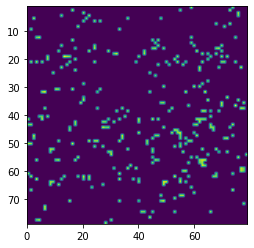

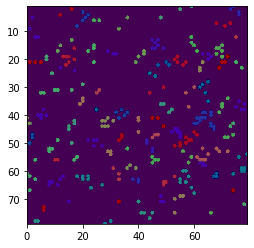

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs90-SNR01_01_04.dat
5 85 [[3654, 3732, 3815, 3734, 3895, 3735, 3653], [4107, 4104, 3942, 3945, 3944], [1389, 1471, 1472], [5128, 5695, 4973, 5129, 5211, 5052, 5208], [1505, 1586, 1503, 1665]]


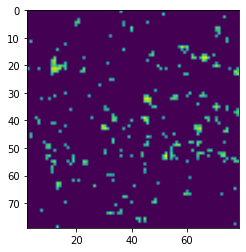

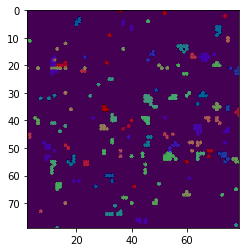

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs95-SNR01_01_04.dat
5 85 [[6122, 6203, 6125, 6205, 6123], [3172], [3146], [1427, 1506, 1347, 1425, 1426, 1507, 1346, 1428, 1350], [1451, 1531, 1611, 1771, 1532, 1612, 1772, 1851, 1773, 1372]]


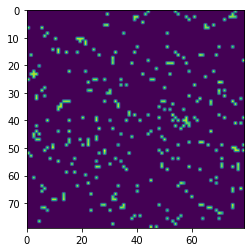

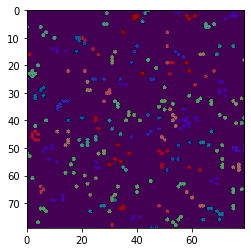

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs85-SNR01_01_05.dat
5 85 [[2194, 2196], [6041, 6039, 6118], [3496, 3417, 3255, 3181, 3262, 3257, 3339, 3258, 3338, 2937, 3419, 3178], [4009, 3929, 4411, 4086, 4328, 4007], [235, 234, 155, 236, 76, 312]]


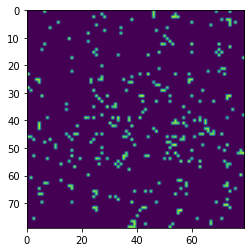

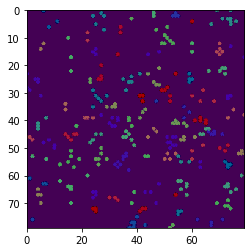

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs90-SNR01_01_05.dat
5 85 [[5385, 5305, 5304, 5464], [2633, 2554, 2553], [3391, 3151, 3310, 3233, 3067, 3392, 3153], [4623, 4463], [1305, 1224, 1145]]


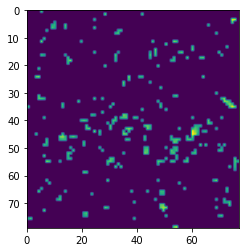

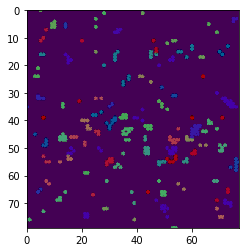

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs95-SNR01_01_05.dat
5 85 [[4107, 4026], [2632, 2469, 2712, 2875, 2714, 2794, 2713, 2876, 2793, 2795, 2874, 2631], [1456, 1535, 1455, 1375, 1294], [4053, 4133, 4212, 4132, 4051, 4134, 4213, 4054], [1492, 1413, 1648, 1493]]


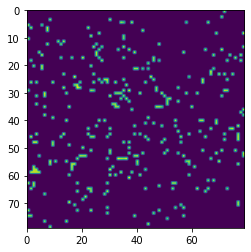

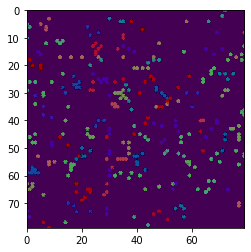

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs85-SNR01_01_06.dat
5 85 [[1191, 1185, 1348, 709], [3849, 3929], [3326, 3409, 3254, 3889, 3414, 3575, 3810], [1204, 1285], [5273]]


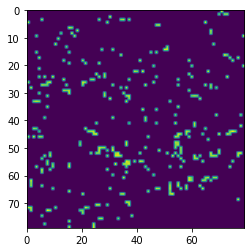

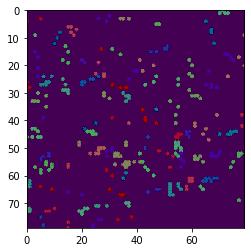

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs90-SNR01_01_06.dat
5 85 [[4457, 4216, 4616, 4376], [3126], [1799, 2037, 1800], [4111, 4031, 4269, 4109], [2309, 1826, 2227, 2225, 2307]]


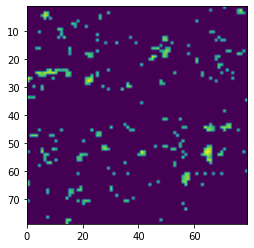

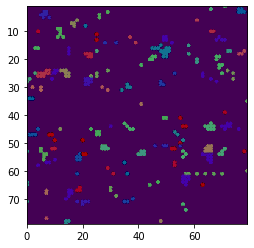

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs95-SNR01_01_06.dat
5 85 [[4568, 4644, 4490, 4567], [2143, 2308, 2063, 2226], [1930, 2010, 2009, 2169, 1931], [5097, 5018, 5017, 5096, 5176, 5098, 5177, 5257, 5016], [3550]]


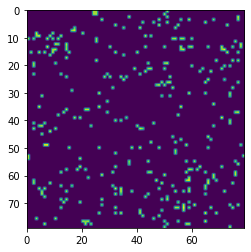

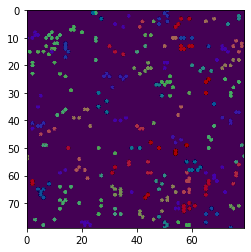

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs85-SNR01_01_07.dat
5 85 [[1730, 1571, 1570], [5318], [2804, 3442, 2485, 1209], [5352, 4631, 4785, 4868, 4948, 5029], [6182, 6263, 6261, 6181, 6180]]


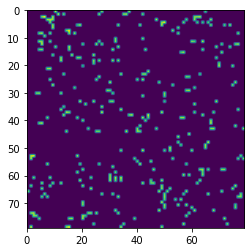

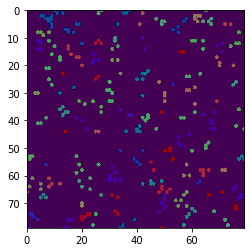

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs90-SNR01_01_07.dat
5 85 [[3976, 3895, 3735, 3659], [1464, 1304, 1466, 1544], [6096, 6334, 6095, 6335], [1271, 1109, 1031], [5517, 5275, 5438, 5518, 5196]]


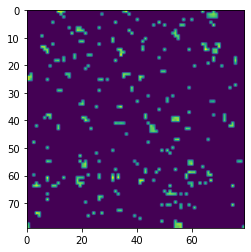

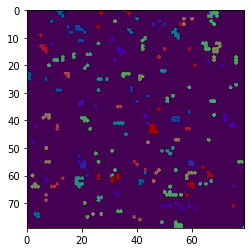

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs95-SNR01_01_07.dat
5 85 [[5731, 5816, 5821, 5732, 5736, 5654, 5729, 5739], [1472, 1153, 1154, 1314, 1234, 1235, 831, 911], [5393, 5312], [1671, 1586], [3363, 3842]]


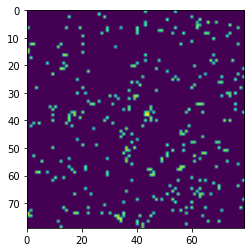

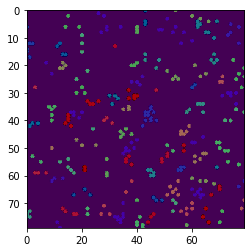

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs85-SNR01_01_08.dat
5 85 [[2796, 2474, 2554, 2476, 2551, 2473], [4195, 3800, 4039, 4116, 3878, 4036, 4117], [509, 667, 589, 188, 514, 106], [6332, 6171], [5421, 5342, 5424, 5260, 5423, 5263, 5503]]


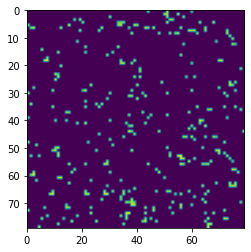

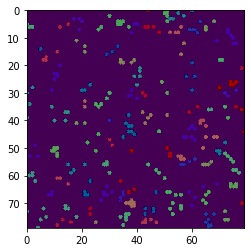

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs90-SNR01_01_08.dat
5 85 [[1035, 875, 713, 633, 949, 1036, 794], [5311, 5547, 5388, 5389, 5308, 5149], [1612, 2010, 1931, 1851, 2329, 1850], [3499, 3420, 3501, 3740, 3738, 3737, 3821], [5339, 5740, 5501]]


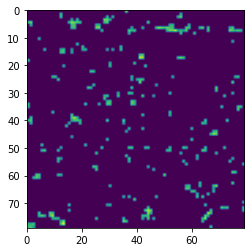

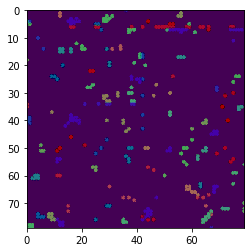

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs95-SNR01_01_08.dat
5 85 [[4411, 4331, 4332], [2040, 2121, 1958, 2038, 2041], [5348, 5268, 5188, 5189], [338, 335, 417, 336, 339, 337, 256, 258, 416], [618, 613, 696, 615, 614, 612, 617, 616]]


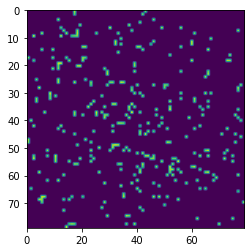

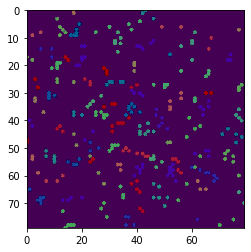

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs85-SNR01_01_09.dat
5 85 [[5533, 5460, 5456, 5535], [2439, 2522, 2441, 2358], [4145, 4146, 4306, 4221], [1380, 1460, 1619, 1618, 1061, 1060, 1381], [3544, 3781]]


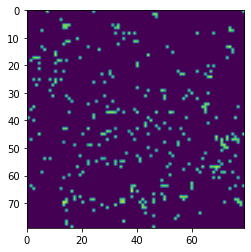

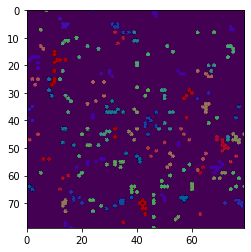

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs90-SNR01_01_09.dat
5 85 [[1364, 1363, 1684, 1441, 1524, 1362], [3895, 3975], [4422, 4425, 4578, 4347, 4502, 4348], [207, 127, 126], [4629, 4470, 4627, 4628, 4788, 4551, 4709, 4630]]


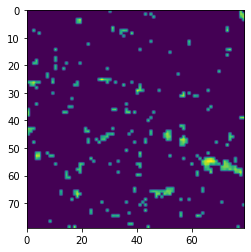

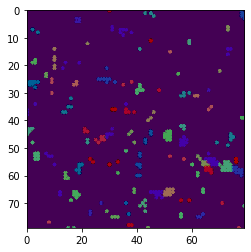

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs95-SNR01_01_09.dat
5 85 [[2756], [4387, 4226, 4467, 4386, 4549, 4388, 4468, 4466, 4385, 4469, 4547, 4548], [5292, 5372], [1693, 1539, 1534], [1193, 1194, 1353]]


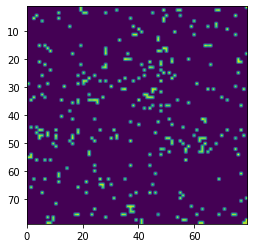

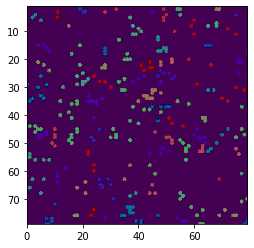

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs85-SNR01_01_10.dat
5 85 [[285], [4291, 4368, 4209, 4364, 4208], [3767, 3844, 3687, 3765, 3764], [2122, 2278, 2200], [6188]]


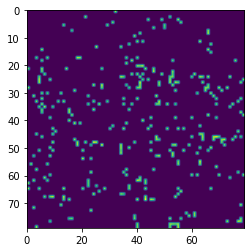

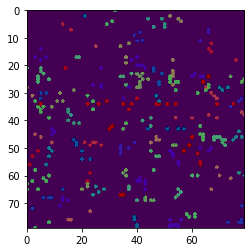

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs90-SNR01_01_10.dat
5 85 [[4535, 4213, 4293, 4132, 4455], [2184, 1707, 2187, 2267], [3530, 3609, 3449], [1983, 1901, 1984, 1980], [5692, 5453, 5535, 5533]]


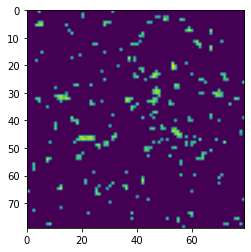

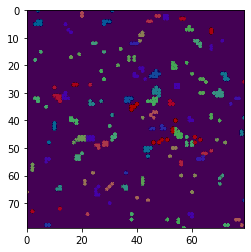

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs95-SNR01_01_10.dat
5 85 [[656, 414, 575], [3260, 3259, 3179], [3704, 3782, 3784, 3703, 3702, 3783], [2215, 2295, 2214, 2294], [5979, 6060, 5980]]


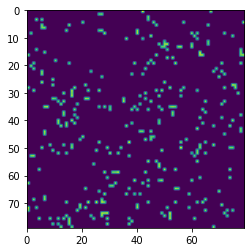

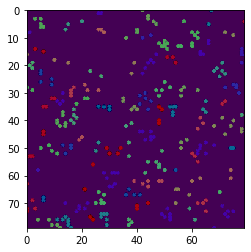

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs85-SNR01_01_11.dat
5 85 [[106, 107], [4909, 4748, 4753, 5151, 5150, 4752, 5072, 4751], [3905, 3988, 3983, 4222, 4063, 4225, 4142], [2732, 2413, 2653, 2651], [1566, 1564, 1723, 1327, 1485, 1882]]


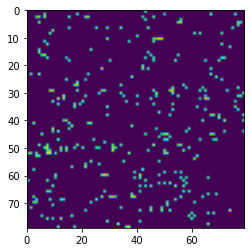

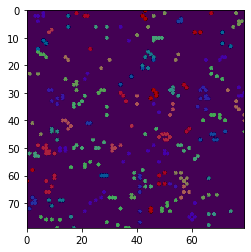

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs90-SNR01_01_11.dat
5 85 [[4448, 3966, 4130, 4211, 4210, 4124], [4092, 4012, 4094, 4014], [917, 514], [2317, 2557, 2558, 2479], [166, 86, 164, 163, 324]]


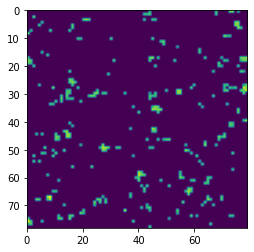

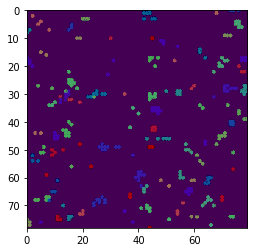

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs95-SNR01_01_11.dat
5 85 [[1869, 1471], [5795, 6118], [1438, 1437, 1518, 1439, 1517, 1519], [3610, 3530, 3611, 3691, 3690], [3904, 3824]]


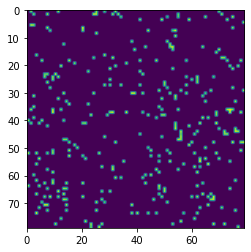

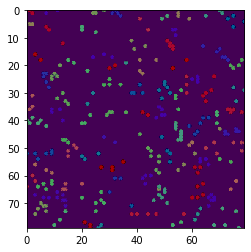

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs85-SNR01_01_12.dat
5 85 [[1308, 1391, 1384], [4843, 4922, 5083, 4845], [1982, 2142, 2062, 2060], [5448, 5363, 5446], [4383, 4546, 4385, 4463]]


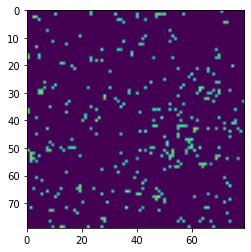

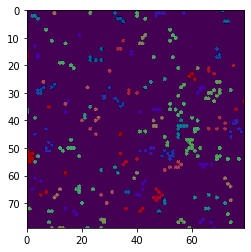

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs90-SNR01_01_12.dat
5 85 [[2974, 2655], [2928, 2926, 3001, 2927], [4544, 4547, 4545, 4624, 4543], [5938, 5774, 5857], [739]]


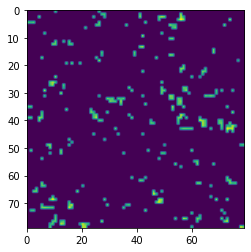

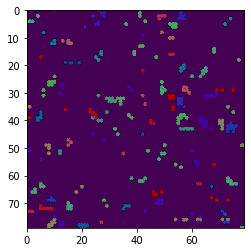

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs95-SNR01_01_12.dat
5 85 [[4462, 4542, 4140, 4461], [3624, 3788], [762], [6253, 6172, 6252, 6010, 6173], [2545, 2548, 2547, 2546, 2469]]


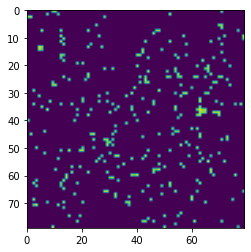

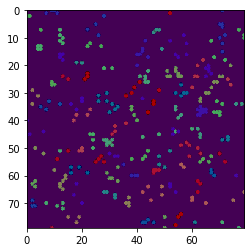

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs85-SNR01_01_13.dat
5 85 [[3575, 3653, 3493], [2736, 2660, 2898, 2580], [777, 1338, 932, 1415, 1334, 1018], [5058, 5620, 5377], [5334, 5172, 5092]]


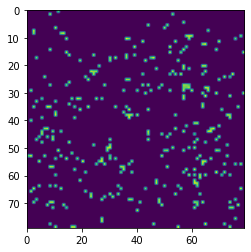

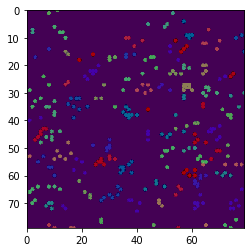

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs90-SNR01_01_13.dat
5 85 [[3507, 3587, 3430, 3508, 3750, 3586, 3829], [4338, 4420, 4741, 4657], [1785, 1784, 1941, 1783, 1626, 2022, 1864], [1092, 1495, 1252], [5880, 5558, 5641, 5557]]


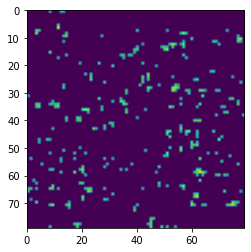

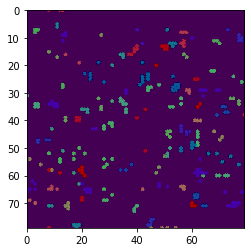

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs95-SNR01_01_13.dat
5 85 [[5358, 5676, 5352, 5677, 5753, 5675, 5754, 5756, 5755], [2649, 2731, 2730, 2729, 2811, 2728, 2810], [2390, 2544, 2385, 2389, 2383, 2384], [5222, 5221, 5223, 5303, 5302, 5060], [2436, 2356]]


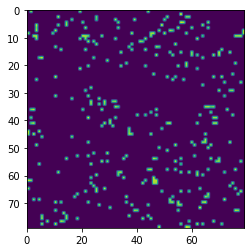

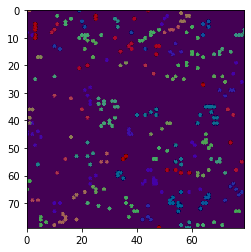

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs85-SNR01_01_14.dat
5 85 [[4301, 3981, 3900], [1469], [5612, 5850, 5610], [211, 449, 290], [5063, 4825, 4903]]


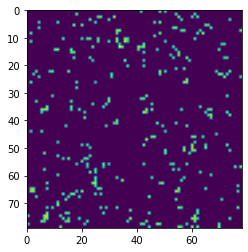

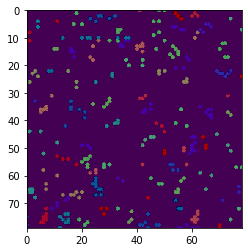

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs90-SNR01_01_14.dat
5 85 [[1734, 1499, 1418, 1737], [5769, 5691, 5534, 5455, 5611], [6298, 6376, 6382, 6375, 6380], [1217, 1377, 1216, 1136], [3002, 3003, 2925, 2765, 2923]]


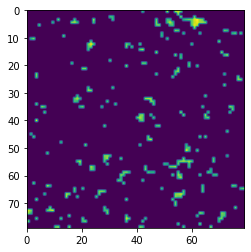

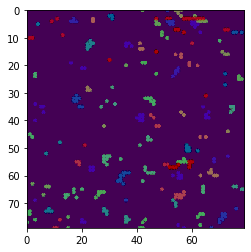

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs95-SNR01_01_14.dat
5 85 [[6295, 6377], [1078, 997, 996, 1076], [4584, 4583, 4664, 4663], [3185, 3186, 3026, 2864, 3105], [461, 462, 380, 703, 460, 381, 541]]


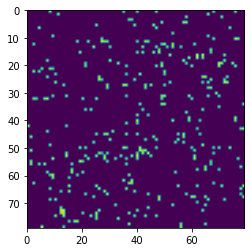

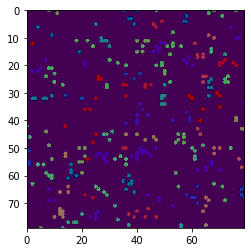

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs85-SNR01_01_15.dat
5 85 [[1497, 1419, 1578, 1660], [4187, 4429, 4268, 4186, 4265, 4348, 4189], [4702, 4705, 4710, 4467, 4625, 4547], [1621, 1541], [5530, 5528, 5208]]


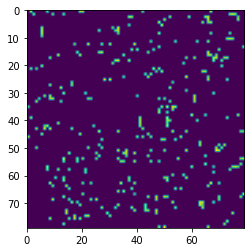

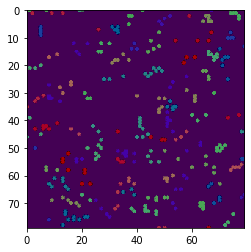

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs90-SNR01_01_15.dat
5 85 [[2133, 2292, 1978], [4340, 4418, 4338], [3903, 3983, 4138], [1299, 1218, 982, 977], [67]]


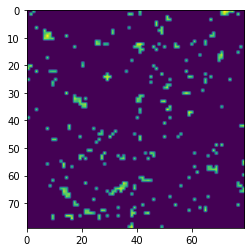

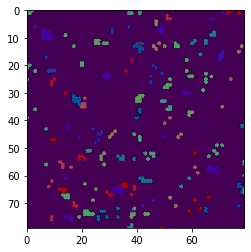

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs95-SNR01_01_15.dat
5 85 [[1949, 1950, 2029, 1869, 1948], [5233, 5234, 5232, 5312, 5314, 5154, 5311, 5235], [2458, 2459, 2457], [807, 648, 483, 566, 646, 728, 806, 726, 809, 647, 808, 727], [4789, 4709, 4707, 4629, 4626, 4708, 4706, 4627]]


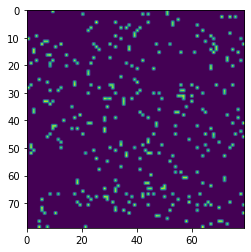

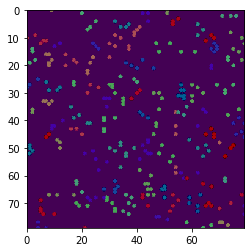

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs85-SNR01_01_16.dat
5 85 [[4345, 4181, 4666, 4104, 4429], [1667, 1747], [4776, 4782, 4937], [1050, 972], [2589, 2829, 2588, 2590]]


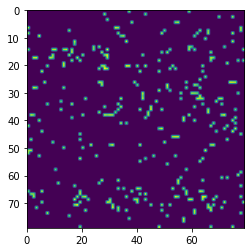

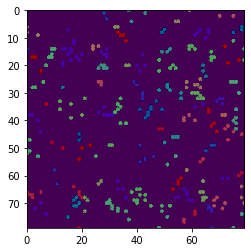

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs90-SNR01_01_16.dat
5 85 [[781, 623, 865, 706, 702, 626], [4993, 5233, 5476, 5235], [1613, 575, 897, 977, 1300, 1459, 1134, 1295, 1378, 1456, 1136, 1133, 1533, 1216], [4953, 4951], [2784, 2861]]


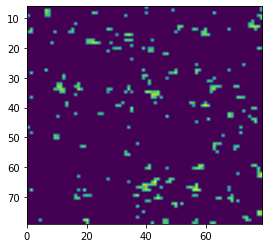

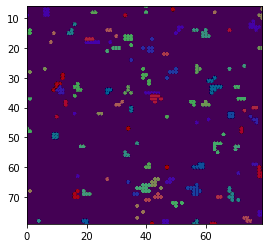

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs95-SNR01_01_16.dat
5 85 [[3657, 3581], [1461, 1462, 1468, 1463, 1464, 1460], [6367, 6366, 6287, 6286], [1092, 1091, 1250, 1171], [3376]]


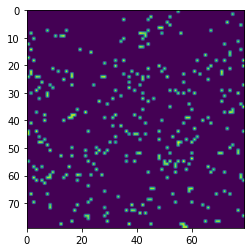

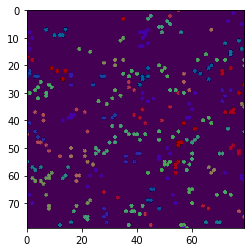

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs85-SNR01_01_17.dat
5 85 [[2779, 2940, 2461, 3178, 3179], [5142, 4665, 4827, 4823], [960, 802, 641, 1121], [4931, 5413, 5654, 6377], [763, 842, 1081, 681, 682, 1004, 604, 683, 1082]]


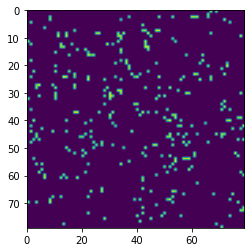

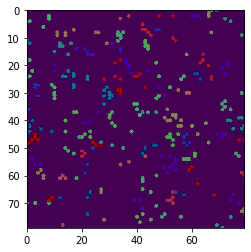

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs90-SNR01_01_17.dat
5 85 [[2288, 2530, 1804], [1770, 1610], [4533, 4292, 4610, 4771, 4374, 4289, 4612, 4454, 4694], [4483, 4485, 4322], [1751, 1912, 1673, 1593]]


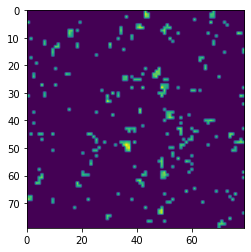

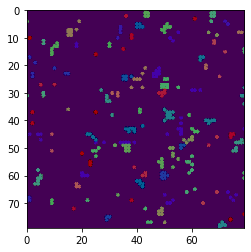

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs95-SNR01_01_17.dat
5 85 [[2381, 2380, 2383], [4740, 4822, 4821, 4820], [1058, 978], [5652, 5410, 5573, 5651], [1967, 1966, 1886, 1888, 1887, 1807, 1728, 1808]]


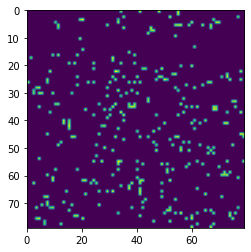

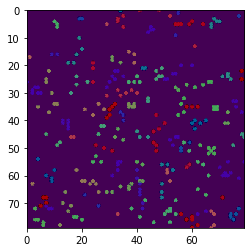

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs85-SNR01_01_18.dat
5 85 [[2243, 2244, 2402, 2405, 2080, 2322, 2404], [3735, 3734, 3812, 3973], [1893, 2051, 1894, 1656, 1660, 2050], [4673, 4831, 4433, 4434, 4513], [5982, 5905]]


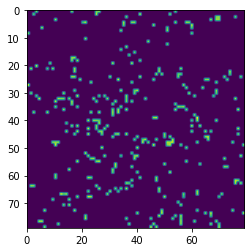

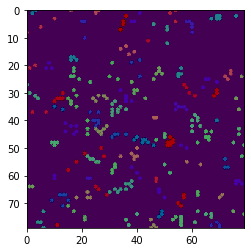

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs90-SNR01_01_18.dat
5 85 [[1687, 1528, 1689], [4921, 4760, 4598], [2065, 2304, 2149, 2066], [2678, 2676, 2354, 2596, 2516], [5490, 5248, 5328]]


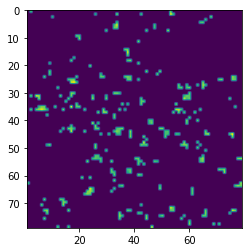

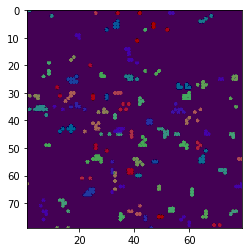

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs95-SNR01_01_18.dat
5 85 [[5155, 5312, 5156], [1157, 1238, 1561, 1318, 1158, 1478, 1479], [3666, 3586, 3667], [2811, 2894], [3555, 3553, 3474, 3554, 3476, 3475]]


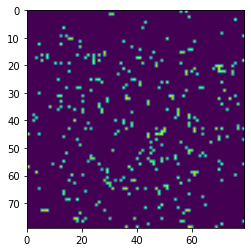

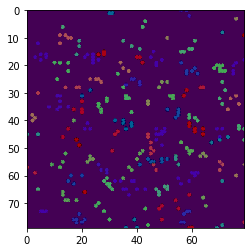

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs85-SNR01_01_19.dat
5 85 [[1596, 1835, 1915, 1675, 1519], [4998, 5243, 5397, 5235, 4999, 5236, 5240, 4994, 4992], [1302, 1544, 1381, 1466, 1304, 1384, 1464], [3463, 3461, 3302], [3647, 3807, 3569, 3490, 3487, 3649, 3969, 3570, 3648]]


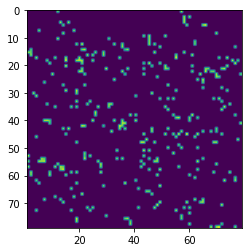

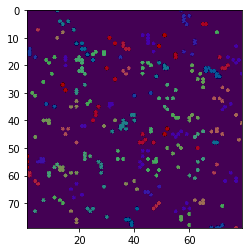

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs90-SNR01_01_19.dat
5 85 [[763, 765, 925, 1005, 845, 1247, 1007], [4602, 4283, 4123, 4442, 4125, 4523], [5458, 5217, 5059, 5381], [1455, 1375, 1615], [2952, 2795, 2873]]


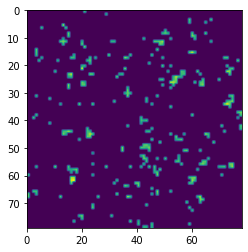

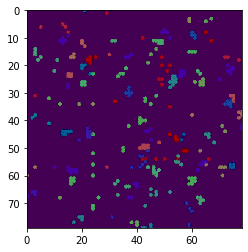

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs95-SNR01_01_19.dat
5 85 [[1817, 1816, 1975, 1897, 1976, 1896], [2175, 2255], [5079, 5080, 5160, 5478, 5477], [4544, 4465, 4464, 4702, 4543], [1318, 1397, 1396]]


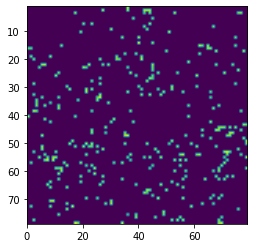

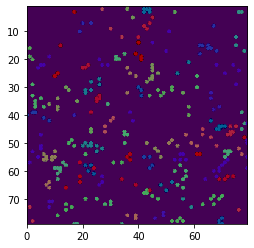

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs85-SNR01_01_20.dat
5 85 [[4375, 4376, 4537, 4535, 4533], [3157, 3398], [4404, 4165, 4085, 3765, 4561, 4242], [1165, 851, 1410], [1528, 1765, 1766, 1844]]


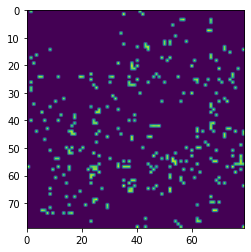

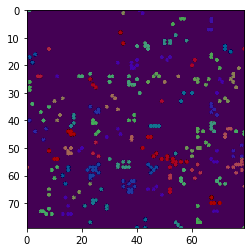

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs90-SNR01_01_20.dat
5 85 [[2469, 2151, 2070], [4099, 4020], [4149, 4387, 4468, 4469], [1553, 1718, 1480, 1638, 1640, 1719, 1558], [5409, 5167, 5246, 5244]]


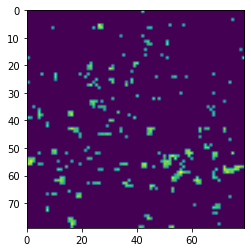

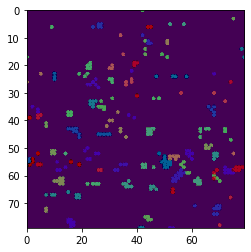

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs95-SNR01_01_20.dat
5 85 [[2802, 2884, 2964], [4219, 4380, 4218, 4138, 4220, 4139, 4299], [1798], [6257, 6095, 6176, 6256, 6096, 6177, 6336, 6175], [4185, 4101, 4343, 4022, 4342, 4186]]


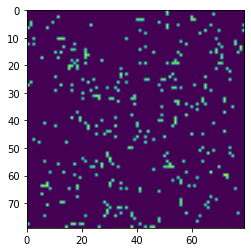

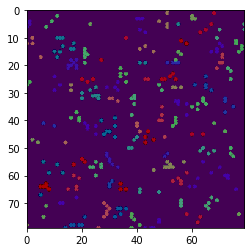

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs85-SNR01_01_21.dat
5 85 [[3462, 3625, 3301, 3385, 3382], [2778, 2694, 3098, 2695, 2775], [6363, 6128, 6366, 6208, 6365], [281, 601, 683, 282, 280], [2330, 1930, 2172]]


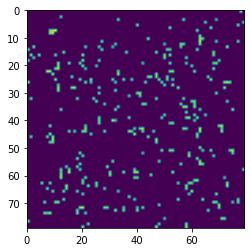

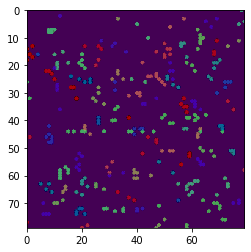

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs90-SNR01_01_21.dat
5 85 [[2943, 2861, 2700, 2701, 2781], [4578, 4659, 4338, 4179, 4499, 4260], [2171, 2331, 2892, 2251, 1690], [4382, 4543, 4463, 4544], [309, 385, 547]]


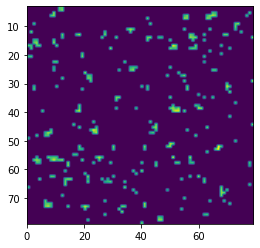

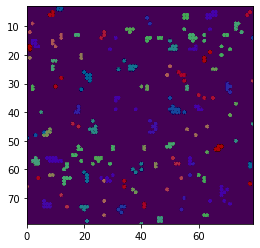

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs95-SNR01_01_21.dat
5 85 [[4570, 4571, 4568, 4572, 4487, 4490, 4489, 4569, 4488], [3099, 3181, 3100, 3180], [1151, 1469], [465, 623, 545, 543, 466, 944, 546, 544, 624], [5148, 4990, 5149, 5066, 5068]]


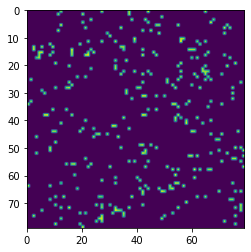

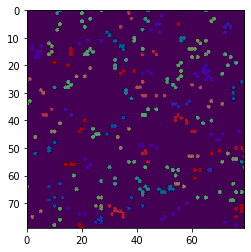

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs85-SNR01_01_22.dat
5 85 [[4047, 3961, 3965, 3962], [1804, 1885, 1882], [6129, 6050, 5658, 5815, 5973], [1284, 1204, 1205, 1364, 1045, 1042, 1122, 1363], [4582, 4503, 4341]]


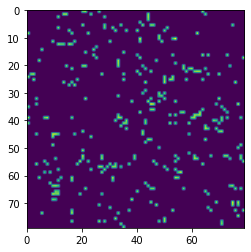

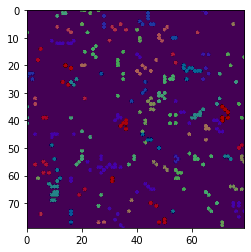

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs90-SNR01_01_22.dat
5 85 [[3591, 3350, 3509, 3268, 3590, 3269], [1320, 1401], [4587, 4586, 4591, 4510, 4422, 4594, 4747, 4512, 4347, 4668, 4663, 4267, 4589, 4592], [976, 975, 973, 897, 971, 972, 889], [6077, 5916, 5757, 5919, 5675, 5677, 5755]]


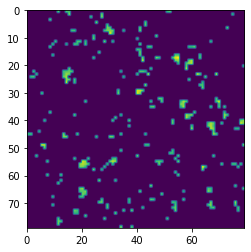

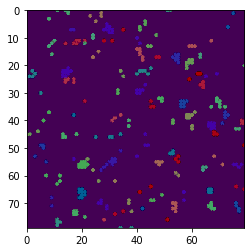

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs95-SNR01_01_22.dat
5 85 [[1985, 1909], [4337], [590, 509, 588, 589, 670, 671, 510, 591, 429], [5337, 5577], [1695, 1774, 1775, 1853, 1855, 1773, 1933, 1854, 1934, 1776]]


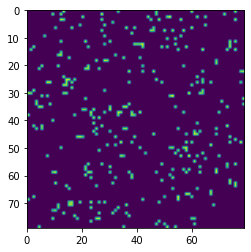

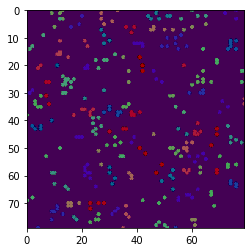

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs85-SNR01_01_23.dat
5 85 [[1701, 1622, 1702], [4385, 4302, 4461, 4299, 4224], [4821, 4581, 5145, 4743, 4502, 4903, 4742, 4661], [316, 76, 152], [1806, 2047, 2129]]


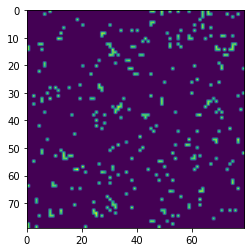

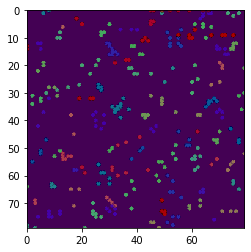

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs90-SNR01_01_23.dat
5 85 [[3308, 3225, 2985, 3467, 3064, 3068, 3385], [3191, 3031, 3029, 2950], [594, 600, 598], [5789, 5952, 5792, 5711, 5870], [147, 303, 224, 146, 144]]


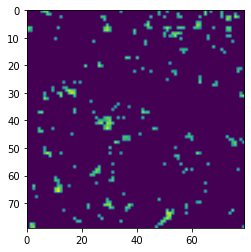

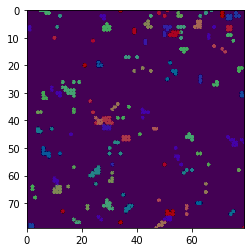

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs95-SNR01_01_23.dat
5 85 [[6130, 6051, 6131, 6052, 6132], [3002, 2922, 3004, 3162, 3003], [548, 866, 786], [2492, 2329, 2411, 2249, 2412], [6026, 6107]]


In [7]:
# single_images structure:
# single_images[slic][loc][image_type] = dic_image 2-D array
#    where image_type is ['e', 'f', 'i'] for electrode, fluorescent, or image
# single_images[slic][loc][map_type][rec] = dat_image 2-D array
#    where map_type is ['Amp', 'SNR', 'Nos'] for amplitude, SNR< or no-stim SNR
# single_images[slic][loc]['stims'] = [stim list indexed by rec #]

percentile_strata = [[80, 85], [85, 90], [90, 95], [95, 100]]
percentile_strata = [[85, 90], [90, 95], [95, 100]]

for slic in single_images:
    for loc in single_images[slic]:
        
        # DICs
        #img = single_images[slic][loc]['i']
        #electrode = single_images[slic][loc]['e']
        #fluor = single_images[slic][loc]['f']
        for rec in single_images[slic][loc]['SNR']:
            
            if process_all or (slic == slice_target and rec in rec_target):
                
                snr = single_images[slic][loc]['SNR'][rec]['data']
                w, h = snr.shape
                cluster_strata = []

                for stratum in percentile_strata:
                    low_cutoff, hi_cutoff = stratum

                    sampled_points = roi.generate_points(snr, n_points=100000, 
                                                         percentile_cutoff=low_cutoff,
                                                         upper_cutoff=hi_cutoff)

                    roi.heatmap_of_scatter(sampled_points, w, h) # should look similar
                
                    k = 85

                    if k is None:
                        # use AIC and elbow method, then enter choice of k above
                        roi.find_gmm_cluster_number(sampled_points, k_start=30, k_step=10, k_search=91)
                        break
                    else: # after manually selecting k
                        labels = roi.gaussian_mixture_model(sampled_points, k, show=False)

                        roi.draw_gmm_enclosures(sampled_points, labels, a=0.01, s=10)

                        # print ROIs to a DAT file to be loaded into PhotoZ
                        filename = dat_dir + "ROIs" + str(low_cutoff) + "-" + single_images[slic][loc]['SNR'][rec]['filename']
                        roi_write = ROIFileWriter()
                        regions = roi_write.export_clusters(filename, labels, sampled_points, w, limit=num_regions_to_export)
                        all_regions_by_pixel = roi_write.get_regions_by_pixel()
                        # regions is in format of doubly-nested list of PhotoZ diode numbers

                        cluster_objs = []
                        for px_region in all_regions_by_pixel:
                            cluster_objs.append(Cluster(px_region, w))
                            
                        cluster_strata.append(cluster_objs)
                        single_images[slic][loc]['SNR'][rec]['cluster_strata'] = cluster_strata

In [8]:
for slic in single_images:
    for loc in single_images[slic]:
        for rec in single_images[slic][loc]['SNR']:
            
            if process_all or (slic == slice_target and rec in rec_target):
                
                snr = single_images[slic][loc]['SNR'][rec]['data']
                w, h = snr.shape
                cluster_strata = single_images[slic][loc]['SNR'][rec]['cluster_strata']
                
                print("Strata sizes (# clusters):", [len(stratum) for stratum in cluster_strata])
                
                # Split non-contiguous clusters until contiguous
                for stratum in cluster_strata:
                    extra_clusters = []
                    for cluster in stratum:
                        new_clusters = cluster.attempt_split()
                        extra_clusters += new_clusters
                    stratum += extra_clusters
                
                # Filter clusters by size
                for stratum in cluster_strata:
                    for i in range(len(stratum)-1, -1, -1):  # strata 1 is the lower-SNR strata
                        if stratum[i].get_cluster_size() > n_pixel_cutoff:
                            del stratum[i]
                            
                # Filter clusters by avg SNR
                for stratum in cluster_strata:
                    if len(stratum) > 1:
                        stratum_snrs = np.array([cluster.get_cluster_snr(snr) for cluster in stratum])
                        snr_cutoff = np.percentile(stratum_snrs, average_snr_cutoff_percentile)
                        for i in range(len(stratum_snrs)-1, -1, -1):
                            if stratum_snrs[i] < snr_cutoff:
                                del stratum[i]

                # filter adjacent (touching) clusters of different clusters -- remove the lower-SNR one. 
                for i in range(len(cluster_strata)):
                    stratum1 = cluster_strata[i]
                    for j in range(i+1, len(cluster_strata)):
                        stratum2 = cluster_strata[j]
                        for ic_1 in range(len(stratum1)-1, -1, -1):  # stratum 1 is the lower-SNR stratum
                            for c2 in stratum2:
                                if stratum1[ic_1].is_adjacent_to(c2):
                                    del stratum1[ic_1]
                                    break
                                    
                print("Strata sizes (# clusters):", [len(stratum) for stratum in cluster_strata])


Strata sizes (# clusters): [85, 85, 85]
Strata sizes (# clusters): [0, 0, 74]
Strata sizes (# clusters): [85, 85, 85]
Strata sizes (# clusters): [0, 0, 65]
Strata sizes (# clusters): [85, 85, 85]
Strata sizes (# clusters): [0, 0, 67]
Strata sizes (# clusters): [85, 85, 85]
Strata sizes (# clusters): [0, 0, 61]
Strata sizes (# clusters): [85, 85, 85]
Strata sizes (# clusters): [0, 0, 71]
Strata sizes (# clusters): [85, 85, 85]
Strata sizes (# clusters): [0, 1, 66]
Strata sizes (# clusters): [85, 85, 85]
Strata sizes (# clusters): [0, 0, 77]
Strata sizes (# clusters): [85, 85, 85]
Strata sizes (# clusters): [0, 1, 74]
Strata sizes (# clusters): [85, 85, 85]
Strata sizes (# clusters): [0, 0, 67]
Strata sizes (# clusters): [85, 85, 85]
Strata sizes (# clusters): [0, 0, 69]
Strata sizes (# clusters): [85, 85, 85]
Strata sizes (# clusters): [0, 0, 69]
Strata sizes (# clusters): [85, 85, 85]
Strata sizes (# clusters): [0, 0, 68]
Strata sizes (# clusters): [85, 85, 85]
Strata sizes (# clusters

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs-highest-SNR01_01_01.dat


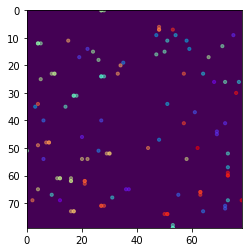

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs-highest-SNR01_01_02.dat


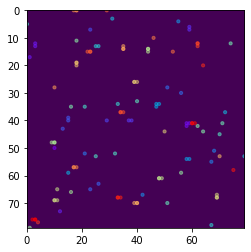

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs-highest-SNR01_01_03.dat


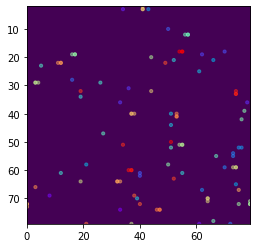

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs-highest-SNR01_01_04.dat


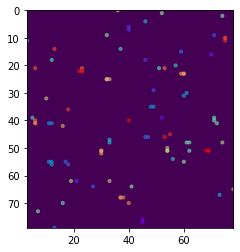

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs-highest-SNR01_01_05.dat


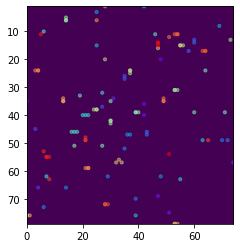

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs-highest-SNR01_01_06.dat
Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs-highest-SNR01_01_06.dat


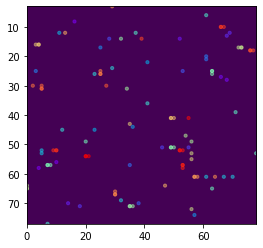

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs-highest-SNR01_01_07.dat


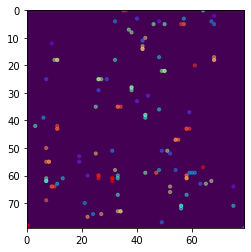

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs-highest-SNR01_01_08.dat
Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs-highest-SNR01_01_08.dat


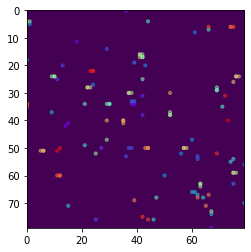

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs-highest-SNR01_01_09.dat


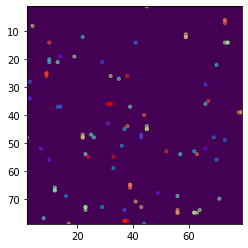

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs-highest-SNR01_01_10.dat


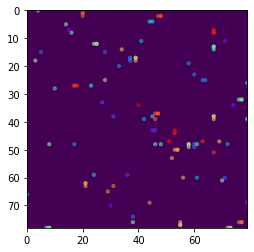

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs-highest-SNR01_01_11.dat


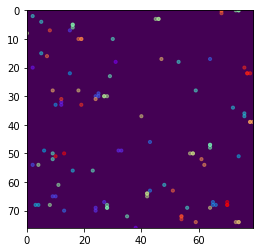

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs-highest-SNR01_01_12.dat


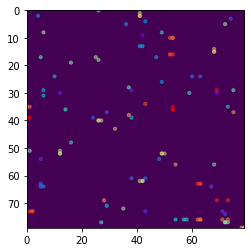

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs-highest-SNR01_01_13.dat


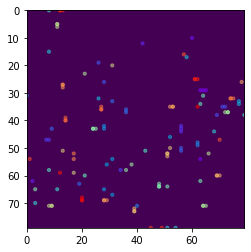

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs-highest-SNR01_01_14.dat


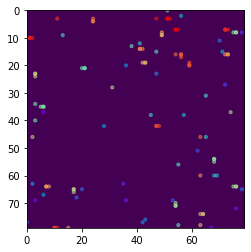

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs-highest-SNR01_01_15.dat


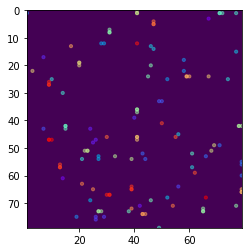

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs-highest-SNR01_01_16.dat
Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs-highest-SNR01_01_16.dat


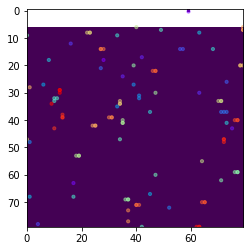

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs-highest-SNR01_01_17.dat


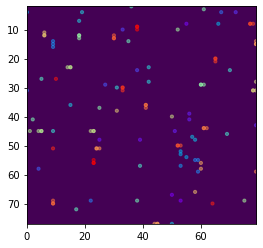

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs-highest-SNR01_01_18.dat


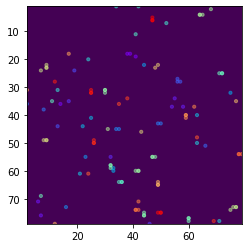

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs-highest-SNR01_01_19.dat


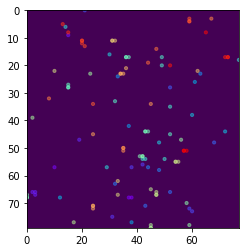

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs-highest-SNR01_01_20.dat
Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs-highest-SNR01_01_20.dat


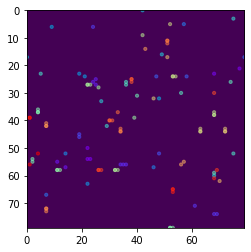

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs-highest-SNR01_01_21.dat


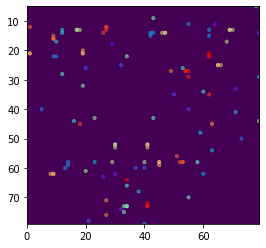

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs-highest-SNR01_01_22.dat
Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs-highest-SNR01_01_22.dat


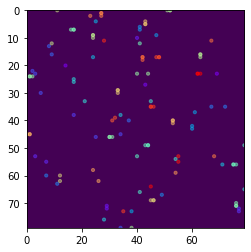

Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs-highest-SNR01_01_23.dat
Regions written to: C:/Users/jjudge3/Desktop/Data/07-12-22/converted_zda/ROIs-highest-SNR01_01_23.dat


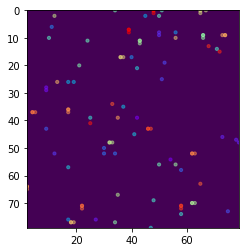

In [9]:
for slic in single_images:
    for loc in single_images[slic]:
        for rec in single_images[slic][loc]['SNR']:
            
            if process_all or (slic == slice_target and rec in rec_target):
                
                snr = single_images[slic][loc]['SNR'][rec]['data']
                w, h = snr.shape
                cluster_strata = single_images[slic][loc]['SNR'][rec]['cluster_strata']
                                                    
                # consolidate strata and show all surviving ROIs
                plt.clf()
                j_label = 0
                for i in range(len(cluster_strata)):
                    stratum = cluster_strata[i]
                    if len(stratum) > 0:
                        pixels = []
                        labels = []
                        for c in stratum:
                            new_pixels = c.get_pixels()
                            pixels += new_pixels
                            labels += [j_label for _ in range(len(new_pixels))]
                            j_label += 1
                        pixels = np.array(pixels)
                        roi.draw_gmm_enclosures(pixels, labels, a=0.5, s=10, show=False, plot_sample_heatmap=False)
                        filename = dat_dir + "ROIs-highest" + "-" + single_images[slic][loc]['SNR'][rec]['filename']
                        roi_write = ROIFileWriter()
                        
                        # export only the highest SNR clusters.
                        regions = roi_write.export_clusters(filename, labels, pixels, w, 
                                                            limit=num_regions_to_export,
                                                            snr=snr)
                plt.show()

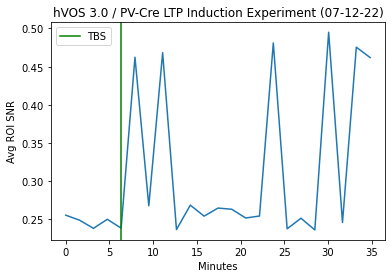

In [19]:
for slic in single_images:
    for loc in single_images[slic]:
        rec_time_course = []
        if process_all or (slic == slice_target and rec in rec_target): 
            for rec in single_images[slic][loc]['SNR']:

                snr = single_images[slic][loc]['SNR'][rec]['data']
                w, h = snr.shape
                cluster_strata = single_images[slic][loc]['SNR'][rec]['cluster_strata']


                time_course_metrics = []

                # find relevant signal statistic for time course
                # avg or max SNR of clusters
                for stratum in cluster_strata:
                    snrs = [c.get_cluster_snr(snr) for c in stratum]  # these are averages
                    if len(snrs) > 0:
                        if time_course_types[time_course_choice] == 'Max':
                            time_course_metrics.append(np.max(snrs))
                        elif time_course_types[time_course_choice] == 'Avg':
                            time_course_metrics.append(np.average(snrs))
                    else:
                        time_course_metrics.append(0)

                # time course
                if time_course_types[time_course_choice] == 'Max':
                    rec_time_course.append(max(time_course_metrics))
                elif time_course_types[time_course_choice] == 'Avg':
                    rec_time_course.append(sum(time_course_metrics) / len(time_course_metrics))

            # time course for all recordings for this slice/loc
            plt.clf()
            times = [i * actual_int_recording / 60 for i in range(len(rec_time_course))]
            plt.plot(times, rec_time_course)
            
            # label TBS time
            t_tbs = times[tbs_recording_no - 1]
            plt.axvline(x = t_tbs, color = 'g', label = 'TBS')
            
            plt.xlabel("Minutes")
            plt.ylabel(time_course_types[time_course_choice] + " ROI SNR")
            plt.title("hVOS 3.0 / PV-Cre LTP Induction Experiment (" + date + ")" )
            plt.legend()
            plt.show()
                

In [ ]:
first_recordings_range = [i for i in range(2, tbs_recording_no)]  # 2 is the first recording at 40 uA
last_recordings_range = [i for i in range(tbs_recording_no+int(len(rec_target)/3), rec_target[-1]+1)]

for slic in single_images:
    for loc in single_images[slic]:
        rec_time_course = []
        for rec in single_images[slic][loc]['SNR']:
            if process_all or (slic == slice_target and rec in rec_target):

                # Export ROIs to ImageZ format for region drawing
                pass
            
                # Create post-pre maps for first and last recordings
                
